In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import randint
import pickle

#sklearn model selection
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#sklearn models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#sklearn preprocessing / metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,ConfusionMatrixDisplay, roc_curve, auc

## Preprocessing

In [94]:
df=pd.read_csv('troop_movements.csv')
df['is_resistance']=df['empire_or_resistance'].str.contains('resistance')

In [95]:
# # Split the data using train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Print the shapes of train and test sets
# print("train_test_split:")
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

In [96]:
# Define the features and target variable
X = df[['homeworld','unit_type']]
y = df['is_resistance']  # Target variable

In [97]:
X_dummy=pd.get_dummies(X)

In [98]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("train_test_split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

train_test_split:
X_train shape: (800, 50)
X_test shape: (200, 50)
y_train shape: (800,)
y_test shape: (200,)


In [99]:
# # Initialize ShuffleSplit
# shuffle_split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# # Split the data
# for train_index, test_index in shuffle_split.split(X_dummy):
#     X_train, X_test = X_dummy.iloc[train_index], X_dummy.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# # Print the shapes of train and test sets
# print("ShuffleSplit:")
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

## Decision Tree Classifier

In [100]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)

In [101]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print('precision: %.2f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.2f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.2f' % f1_score(y_test, y_pred,average='weighted'))

Accuracy:  0.48
precision: 0.48
recall: 0.48
f1_score: 0.48


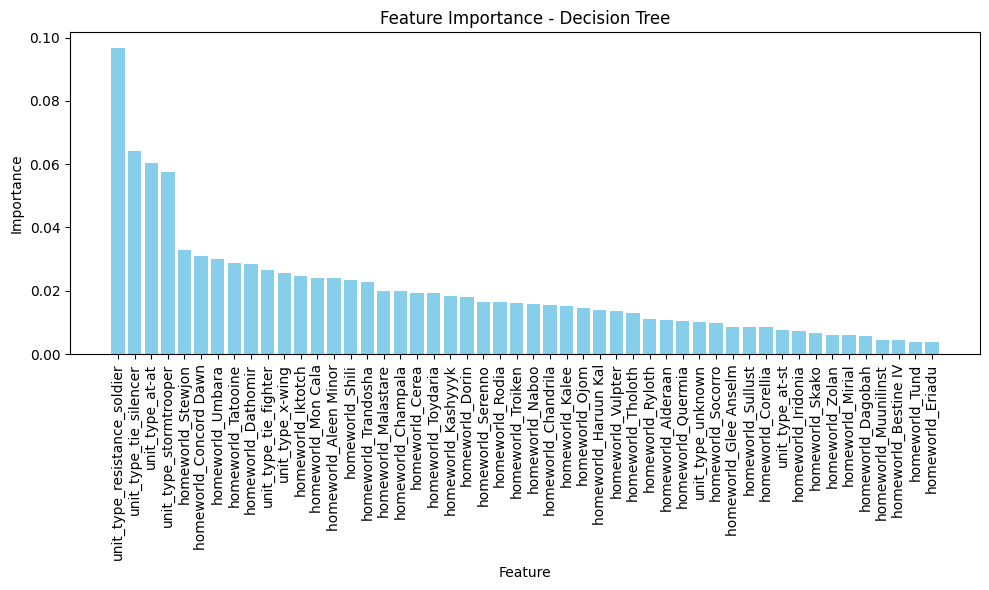

In [102]:
# Get feature importance
importance=dtc.feature_importances_

#Create df to hold feature importance
feature_importances=pd.DataFrame({'Feature': X_dummy.columns, 'Importance': importance})
feature_importances=feature_importances.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(10,6))
plt.bar(feature_importances['Feature'],feature_importances['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Random Forest Model

In [103]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred=dtc.predict(X_test)

In [104]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print('precision: %.2f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.2f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.2f' % f1_score(y_test, y_pred,average='weighted'))

Accuracy:  0.48
precision: 0.48
recall: 0.48
f1_score: 0.48


[Text(0.9606741576506547, 0.9893617021276596, 'x[34] <= 0.5\ngini = 0.495\nsamples = 497\nvalue = [360.0, 440.0]'),
 Text(0.9325842703574891, 0.9680851063829787, 'x[27] <= 0.5\ngini = 0.496\nsamples = 489\nvalue = [358, 427]'),
 Text(0.946629214004072, 0.9787234042553192, 'True  '),
 Text(0.9044943834116076, 0.9468085106382979, 'x[31] <= 0.5\ngini = 0.497\nsamples = 476\nvalue = [354, 411]'),
 Text(0.8764044971602938, 0.925531914893617, 'x[36] <= 0.5\ngini = 0.496\nsamples = 457\nvalue = [334, 402]'),
 Text(0.8483146122981156, 0.9042553191489362, 'x[5] <= 0.5\ngini = 0.497\nsamples = 443\nvalue = [330.0, 388.0]'),
 Text(0.8202247302142087, 0.8829787234042553, 'x[10] <= 0.5\ngini = 0.496\nsamples = 433\nvalue = [320, 382]'),
 Text(0.7921348536868443, 0.8617021276595744, 'x[14] <= 0.5\ngini = 0.494\nsamples = 414\nvalue = [303, 376]'),
 Text(0.7640449882725652, 0.8404255319148937, 'x[3] <= 0.5\ngini = 0.497\nsamples = 399\nvalue = [300, 353]'),
 Text(0.7359551450844561, 0.819148936170212

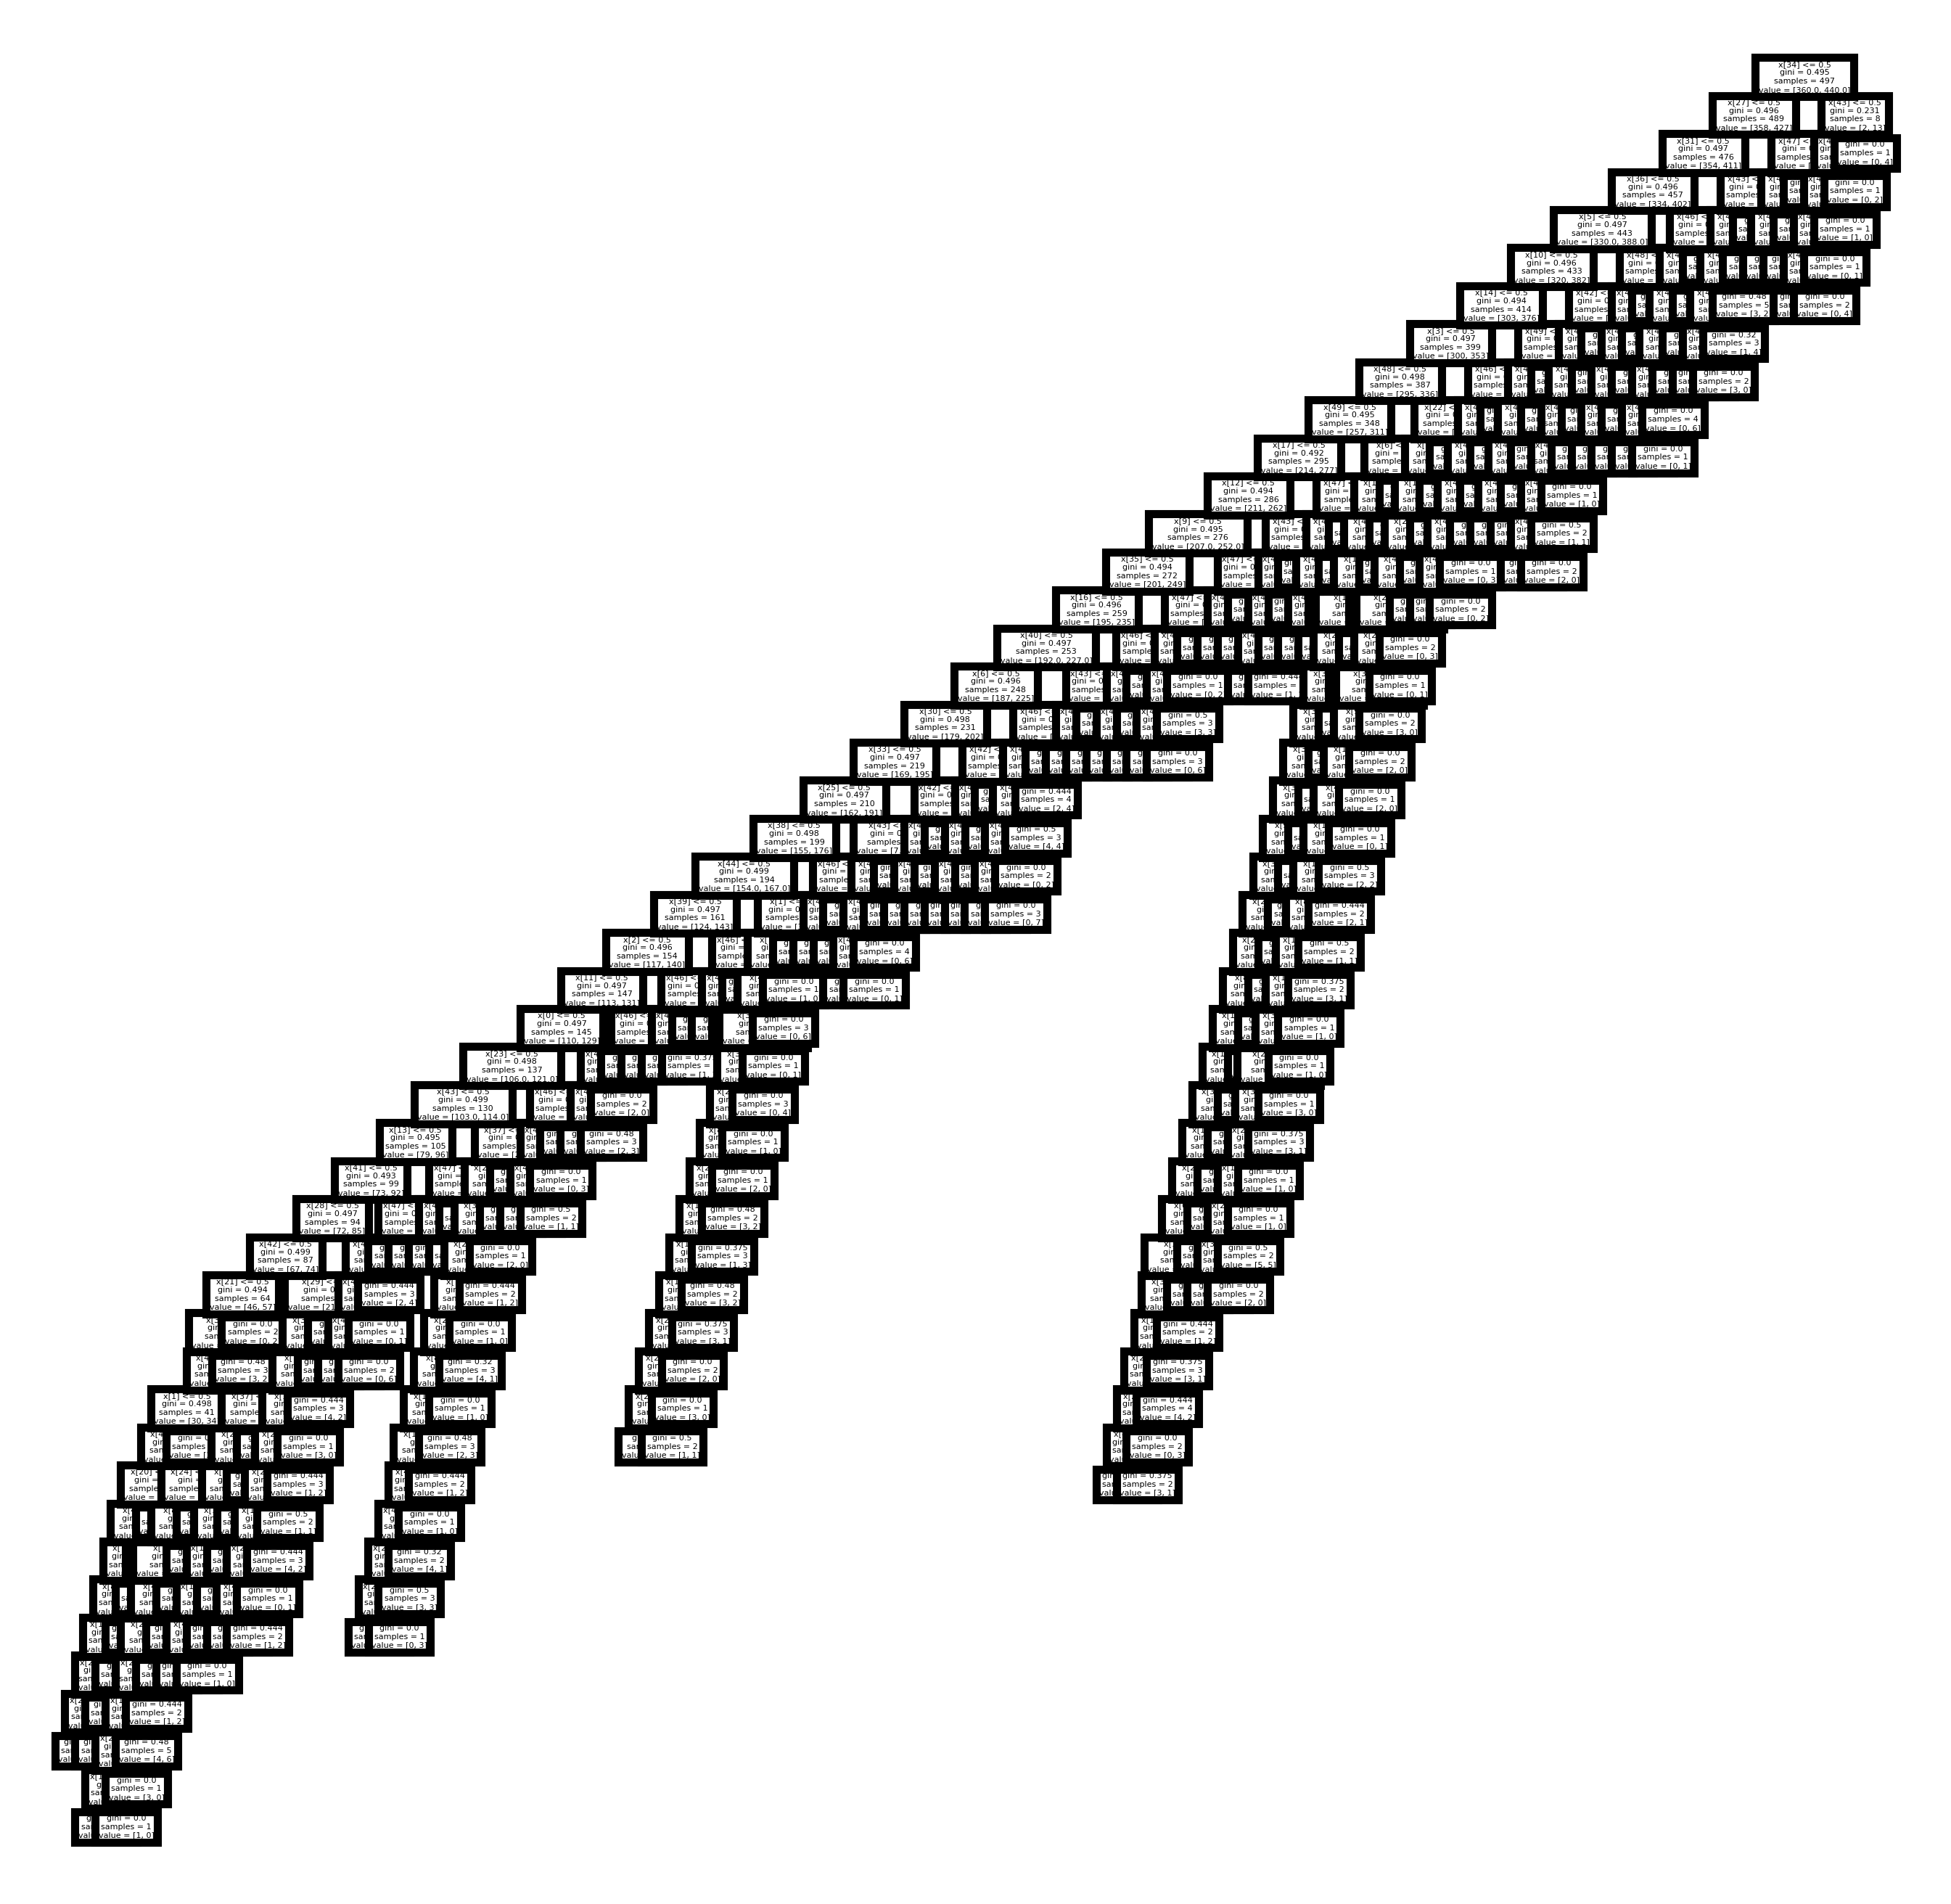

In [105]:
fn=features = list(df.columns[1:])
cn=df.is_resistance

#conversion from list of numpy.int64 to list of string
cn=[str(x) for x in cn]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0])

## Logistic Regression Model

In [106]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)
print('precision: %.2f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.2f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.2f' % f1_score(y_test, y_pred,average='weighted'))

Accuracy:  0.49
precision: 0.49
recall: 0.49
f1_score: 0.49


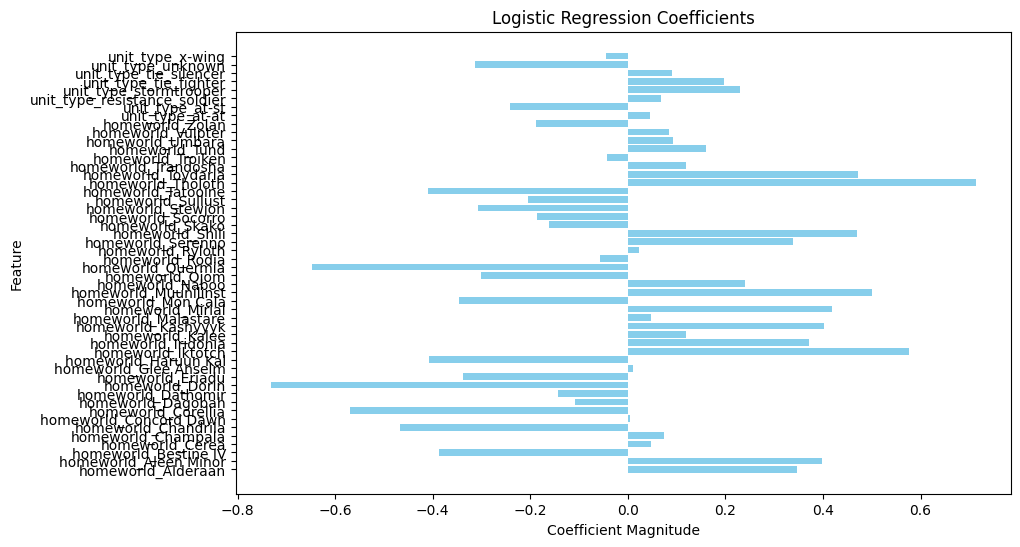

In [107]:
coef = lr.coef_[0]
feature_names = X_dummy.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coef, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

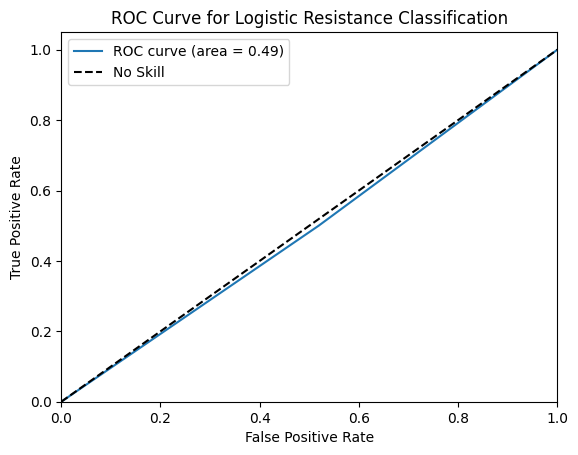

In [108]:
#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Resistance Classification')
plt.legend()
plt.show()

## Naive Bayes Classifier

In [109]:
# Build a Gaussian Classifier
nb = GaussianNB()

# Model training
nb.fit(X_train, y_train)

# Predict Output
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('precision: %.2f' % precision_score(y_test, y_pred,average='weighted'))
print('recall: %.2f' % recall_score(y_test, y_pred,average='weighted'))
print('f1_score: %.2f' % f1_score(y_test, y_pred,average='weighted'))

Accuracy: 0.49
precision: 0.49
recall: 0.49
f1_score: 0.49


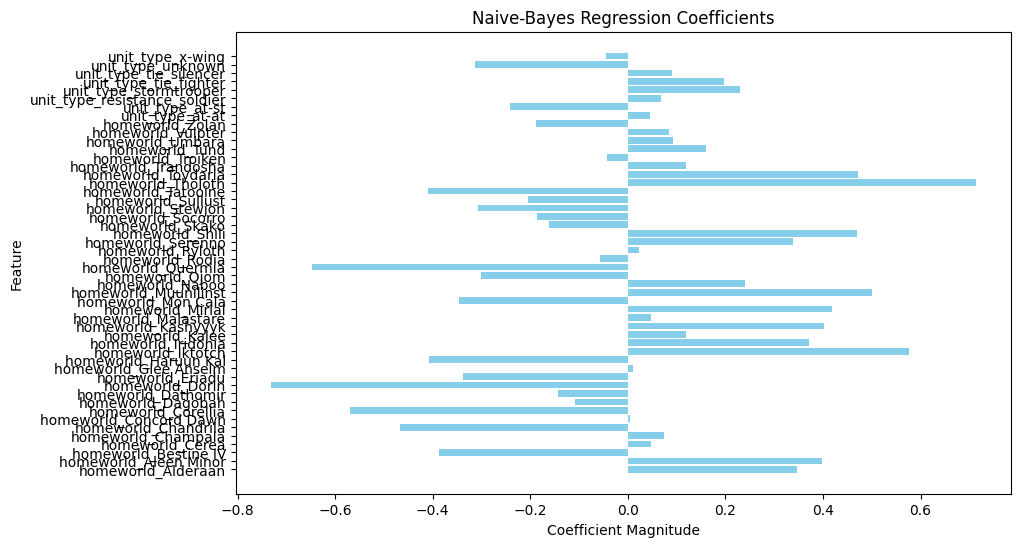

In [110]:
coef = nb.coef_[0]
feature_names = X_dummy.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coef, color='skyblue')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Naive-Bayes Regression Coefficients')
plt.show()

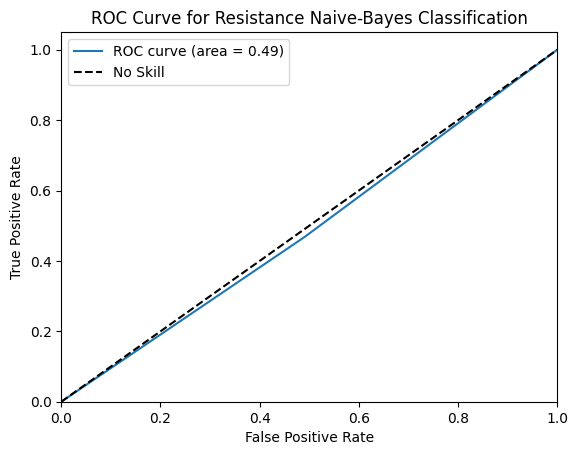

In [111]:
#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Resistance Naive-Bayes Classification')
plt.legend()
plt.show()

## Pickle File Export

In [114]:
pickle.dump(dtc , open('dtc.pk1' , 'wb'))
pickle.dump(rf , open('rf.pk1' , 'wb'))
pickle.dump(lr , open('lr.pk1' , 'wb'))
pickle.dump(nb , open('nb.pk1' , 'wb'))